In [4]:
## Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cargar el dataset
df = pd.read_csv('./Datos/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


### Regresión logística
### 0-Windows
### 1-Mac
### 2-Linux

In [6]:
## 2. Train - test - split
X=df[['duracion','paginas','acciones','valor']]
y=df['clase']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
## Paso 3. Definir el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
modelo_log = LogisticRegression(max_iter=1000)
modelo_Gaussian = GaussianNB()

In [38]:
## Paso 4. Ajustar modelo
model_log = modelo_log.fit(X_train,y_train)
model_NB = modelo_Gaussian.fit(X_train,y_train)


In [39]:
## Paso 5. Predecir
y_pred_log = model_log.predict(X_test)
y_pred_NB =model_NB.predict(X_test)

y_pred_proba_log=model_log.predict_proba(X_test)
y_pred_proba_NB=model_NB.predict_proba(X_test)

In [20]:
## Paso 6. Evaluar 

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc

In [41]:
## Revisión
print(confusion_matrix(y_test,y_pred_log))

[[21  3  1]
 [10  5  0]
 [ 0  0 11]]


In [42]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        25
           1       0.62      0.33      0.43        15
           2       0.92      1.00      0.96        11

    accuracy                           0.73        51
   macro avg       0.74      0.72      0.71        51
weighted avg       0.71      0.73      0.70        51



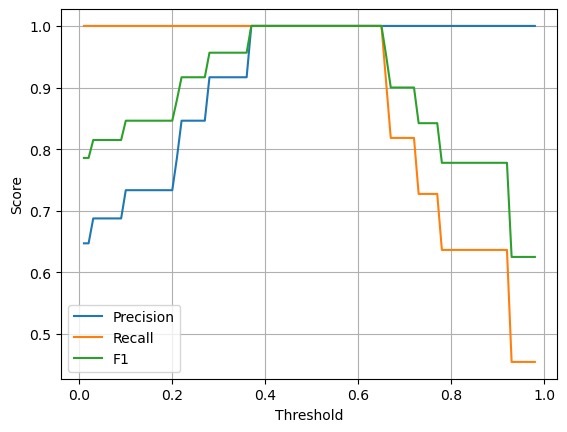

In [44]:
threshold= np.arange(0.01,0.99,0.01)
precision=[]
recall=[]
f1=[]
tpr=[]
fpr=[]

for t in threshold:
    y_pred_temp_log=np.where(y_pred_proba_log[:,2]>t,True,False)
    y_test_temp=y_test==2
    TP=(y_test_temp & y_pred_temp_log).sum()
    TPFP=y_pred_temp_log.sum()
    TPFN=y_test_temp.sum()

    prec=TP/TPFP
    reca=TP/TPFN

    F1 =2*(prec*reca)/(prec+reca)

    precision.append(TP/TPFP)
    recall.append(TP/TPFN)
    f1.append(F1)

fig,ax=plt.subplots()
ax.plot(threshold,precision,label='Precision')
ax.plot(threshold,recall,label='Recall')
ax.plot(threshold,f1,label='F1')
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.grid(True)
ax.legend()
plt.show()